# YZV211 - HW3 - Explatory Analysis & Statistical Inference

In this assignment, you will be proceeding with analysing your answers from the survey. **Read each question thoroughly, write the code for visualization and make an explanation if question asks for. Do not forget to read the assignment document!**

We first start by importing the necessary libraries for our homework.

In [166]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [167]:
df = pd.read_csv('survey_v2.csv')
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Do you have to work to cover your living expenses?,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,How would you describe your regular diet?,"How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ?",Being good at Maths requires,Being good at Programming requires,Being good at Arts/Music requires,Being good at Sports requires
0,2.25,0,3.4,BA,12,No,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,AA,75,Yes,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,CB,120,No,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,AA,10,No,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,BB,10,No,10,10,15,5,10,4,1,2,3,1,1


## Q1.1) Just to keep the column names simple, please rename them here

You may need view the exact column names

In [168]:
# SEE THE COLUMN NAMES HERE
df.columns

Index(['GPA', 'Repeat_Course_Num', 'Expected_GPA', 'Expected_Letter_Grade',
       'Travel_Time', 'Do you have to work to cover your living expenses? ',
       'Time_For_Study', 'Time_For_Hobbies', 'Time_For_Sports',
       'Time_For_Socializing', 'Time_For_Entertainment',
       'How would you describe your regular diet? ',
       'How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ? ',
       'Being good at Maths requires ', 'Being good at Programming requires ',
       'Being good at Arts/Music requires ', 'Being good at Sports requires '],
      dtype='object')

In [169]:
# YOUR INPLACE COLUMN RENAMING FUNCTION
df.rename(columns={"Do you have to work to cover your living expenses? ": "Cover Living Expenses", "How would you describe your regular diet? ": "Regular Diet", "How many sugary drinks (coke, fruit juice, sweet hot drinks etc) do you consume a day ? ": "Sugar Consumption", "Being good at Maths requires ": "Maths", "Being good at Programming requires ": "Programming", "Being good at Arts/Music requires ": "Arts", "Being good at Sports requires ": "Sports"}, inplace=True)

In [170]:
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Expected_Letter_Grade,Travel_Time,Cover Living Expenses,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Regular Diet,Sugar Consumption,Maths,Programming,Arts,Sports
0,2.25,0,3.4,BA,12,No,16,10,7,20,10,3,1,3,3,2,4
1,3.30,0,4.0,AA,75,Yes,30,0,6,168,0,4,1,5,5,5,5
2,2.69,0,3.0,CB,120,No,20,5,1,10,10,3,1,3,3,5,3
3,0.00,0,3.5,AA,10,No,20,10,10,15,13,2,1,3,4,2,5
4,2.80,0,3.0,BB,10,No,10,10,15,5,10,4,1,2,3,1,1


## Q1.2a) Apply mapping on the expected letter grades from string to floating point number

You may need to have a look at to our school's website to convert the letter grades from string to floating point number. In this regard, the grades should be appearing as AA --> 4.0, BA --> 3.5, DD --> 1.0, FF --> 0.0.

In [171]:
## FIRST WRITE A MAPPING FUNCTION, THEN APPLY IT ON THAT SPECIFIED COLUMN
lg = []
def mapper(x: str) -> float:
    letters = {"AA": 4.0, "BA": 3.5, "BB": 3.0, "CB": 2.5, "CC": 2.0, "DC": 1.5, "DD": 1.0, "FF": 0.0}
    x = letters[x] # map the letter grade to the corresponding number
    return x

for i, elem in enumerate(df["Expected_Letter_Grade"]):
    lg.append(mapper(elem)) # append the mapped value to the list

df.drop("Expected_Letter_Grade", axis=1, inplace=True)
df["Expected_Letter_Grade"] = lg # add the new column to the dataframe (we deleted the old one)

## Q1.2b) Apply mapping on the "Is_Working" column to represent it binary

"Yes" would correspond to a 1 whereas a "No" would correspond to a 0.

In [172]:
## CREATE A SIMILAR MAPPING FOR YES/NO TYPE OF ANSWERS
binary = []
def mapper_binary(x: str) -> int:
    binary = {"Yes": 1, "No": 0} # map the answer to the corresponding number
    return binary[x]

for i, elem in enumerate(df["Cover Living Expenses"]):
    binary.append(mapper_binary(elem)) # append the mapped value to the list

df.drop("Cover Living Expenses", axis=1, inplace=True)
df["Cover Living Expenses"] = binary # add the new column to the dataframe (we deleted the old one)

In [173]:
display(df.head())

,GPA,Repeat_Course_Num,Expected_GPA,Travel_Time,Time_For_Study,Time_For_Hobbies,Time_For_Sports,Time_For_Socializing,Time_For_Entertainment,Regular Diet,Sugar Consumption,Maths,Programming,Arts,Sports,Expected_Letter_Grade,Cover Living Expenses
0,2.25,0,3.4,12,16,10,7,20,10,3,1,3,3,2,4,3.5,0
1,3.30,0,4.0,75,30,0,6,168,0,4,1,5,5,5,5,4.0,1
2,2.69,0,3.0,120,20,5,1,10,10,3,1,3,3,5,3,2.5,0
3,0.00,0,3.5,10,20,10,10,15,13,2,1,3,4,2,5,4.0,0
4,2.80,0,3.0,10,10,10,15,5,10,4,1,2,3,1,1,3.0,0


# Q2) Describe Data

Try to express the features of the dataset by using 5-figure summary and mean & standard deviation statistics. Describe what you see down below.

A2)

In [301]:
## DESCRIBE THE DATASET
df.describe()

"""
As we converted the categorical data into numerical data, we can now use the describe function to get the mean, standard deviation, min, max, etc. of the numerical data.

It can be seen that the expected GPA at the end of the bachelor is higher than people's current GPA. Then we can see that the average travel time is about 41 minutes from campus. 

People spend time for studying about 16 hours per week but it varies a lot since the standard deviation is 11.26.

People are consuming a lot of sugar drinks.

People think that programming requires more work than skills comparing to other fields.
Maths has the third highest mean value to this. 

Average expected letter grade is 3.51 which is a BA.

People generally do not cover their living expenses.

Max GPA is 3.95 which is amazing for a student to achieve. Someone expects their GPA to be 4.0 which is also amazing.
"""

"\nAs we converted the categorical data into numerical data, we can now use the describe function to get the mean, standard deviation, min, max, etc. of the numerical data.\n\nIt can be seen that the expected GPA at the end of the bachelor is higher than people's current GPA. Then we can see that the average travel time is about 41 minutes from campus. \n\nPeople spend time for studying about 16 hours per week but it varies a lot since the standard deviation is 11.26.\n\nPeople are consuming a lot of sugar drinks.\n\nPeople think that programming requires more work than skills comparing to other fields.\nMaths has the third highest mean value to this. \n\nAverage expected letter grade is 3.51 which is a BA.\n\nPeople generally do not cover their living expenses.\n\nMax GPA is 3.95 which is amazing for a student to achieve. Someone expects their GPA to be 4.0 which is also amazing.\n"

# Q3) Comment on the Data

Answer the following questions on the data while providing graphs as a way to support your answers.

Q3a) What is the ratio between the students who work and those who do not?

A3a):

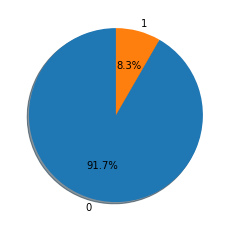

In [240]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
values = df["Cover Living Expenses"].value_counts() # get the number of students who cover their living expenses

plt.pie(values, labels=values.index, autopct='%1.1f%%', shadow=True, startangle=90) # plot the pie chart
plt.show()
# over 90 percent of the students are not working to cover their living expenses.

Q3b) What is the average of the Expected GPA? Also, is there any anomaly on its value distribution?

A3b):

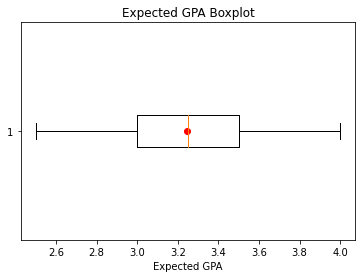

In [205]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
plt.boxplot(df["Expected_GPA"], vert=False) # plot the boxplot
plt.scatter(sum(df["Expected_GPA"])/len(df["Expected_GPA"]), 1, color="red") # plot the mean
plt.title("Expected GPA Boxplot")
plt.xlabel("Expected GPA")
plt.show()
# in the graph, we can see that the box is distributed quite evenly. The mean is also close to the median, which means that the distribution is almost symmetric. (not perfect)

Q3c) What is the avergae of the Expected Letter Grade? Also, is there any anomaly on its value distribution?

A3c):

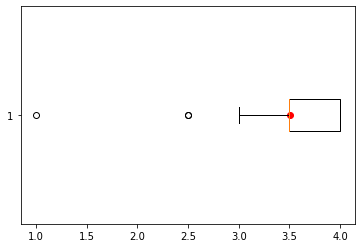

In [206]:
# PROVIDE AN ACCEPTABLE GRAPH TO SUPPORT THIS CLAIM
plt.boxplot(df["Expected_Letter_Grade"], vert=False)
plt.scatter(sum(df["Expected_Letter_Grade"])/len(df["Expected_Letter_Grade"]), 1, color="red")
plt.show()
# in the graph, the box is not distributed evenly. I myself was expecting BA but it was because that I loved data science. People mostly expecting AA or BA makes this distribution skewed to the right. The mean is also close to the median, but there is no lower quartile and also the highest value and upper quartile is the same, AA which makes this boxplot not symmetric. There are also outliers (which I believe are the people who are more honest about their grades).

Q3d) Is there a strong correlation ($r_{xy} > 0.5 || r_{xy} < -0.5$) between the travel time and Expected Letter Grade? If so, what is the sample Pearson correlation coefficient?

A3d):

0.06618742424650481


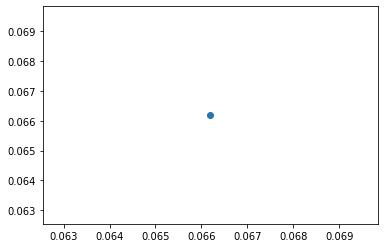

In [264]:
# PROVIDE AN ACCEPTABLE GRAPH AND CALCULATE THE CORRELATION COEFFICIENT TO SUPPORT THIS CLAIM
# P.S: You should not use the pandas' or sklearn's corr function for this section,
# you need to write it down from scratch.

# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
# correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

from math import sqrt # calculate the correlation coefficient

def stdcalc(data):
    mean = sum(data) / len(data)
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    std = sqrt(sum(deviations) / len(data)) # calculate the standard deviation by square rooting the variance
    return std

def corr(x: pd.Series, y: pd.Series) -> float:
    r = sum( (x - sum(x)/len(x)) * (y - sum(x)/len(x))) * 1/(len(x)-1) # calculate the covariance
    r = r / (stdcalc(x) * stdcalc(y)) # divide the covariance by the product of the standard deviations
    return r

print(corr(df["Travel_Time"], df["Expected_Letter_Grade"])) # print the correlation coefficient
plt.scatter(corr(df["Travel_Time"], df["Expected_Letter_Grade"]), corr(df["Travel_Time"], df["Expected_Letter_Grade"])) # plot the correlation coefficient
plt.show()

# as it can be seen in the graph, the correlation coefficient is very close to 0, which means that there is almost no
# correlation between the travel time and the expected letter grade.

Q3e) Define a threshold for travel time in which you will be able to group the individuals that are proximate and distant. Then, describe these groups to see which features have changed significantly and remained unchanged. Write the things that you noticed down below.

A3e):

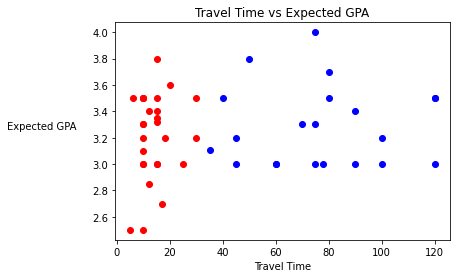

'\nGenerally the distribution remained unchanged, but the mean of the higher travel time group is higher than the lower travel time group\nThis may mean that the students who have higher travel time have higher fighthing spirit and are more determined to get a higher GPA. (this theory is not proven yet)\n'

In [292]:
# WRITE YOUR IMPLEMENTATION HERE!! 
TAU = 30 # Change this to a sensible value
        # Group the dataframe based on the TAU value
        # Desribe the statistics of these 2 newly-created dataframes

lower = df[df["Travel_Time"] <= TAU]
higher = df[df["Travel_Time"] > TAU]

plt.scatter(lower["Travel_Time"], lower["Expected_GPA"], color="red") # plot the lower travel time group
plt.scatter(higher["Travel_Time"], higher["Expected_GPA"], color="blue") # plot the higher travel time group
plt.title("Travel Time vs Expected GPA")
plt.xlabel("Travel Time")
plt.ylabel("Expected GPA", rotation=0, labelpad=50) # labelpad is used to move the label to the left
plt.show()
"""
Generally the distribution remained unchanged, but the mean of the higher travel time group is higher than the lower travel time group
This may mean that the students who have higher travel time have higher fighthing spirit and are more determined to get a higher GPA. (this theory is not proven yet)
"""

Q3f) Define a threshold of $3.0$ for GPA and draw 3 plots side-by-side in which the x-axis is defined as the time for study and y-axis is chosen among time for hobbies, sports and socializing. Select an appropriate plot type for this task. Use green color to mark GPAs greater than or equal to $3.0$ and blue for GPAs lower than $3.0$. Do you notice any difference in preferences among these two segments? Do not forget to use a legend! 

A3f):

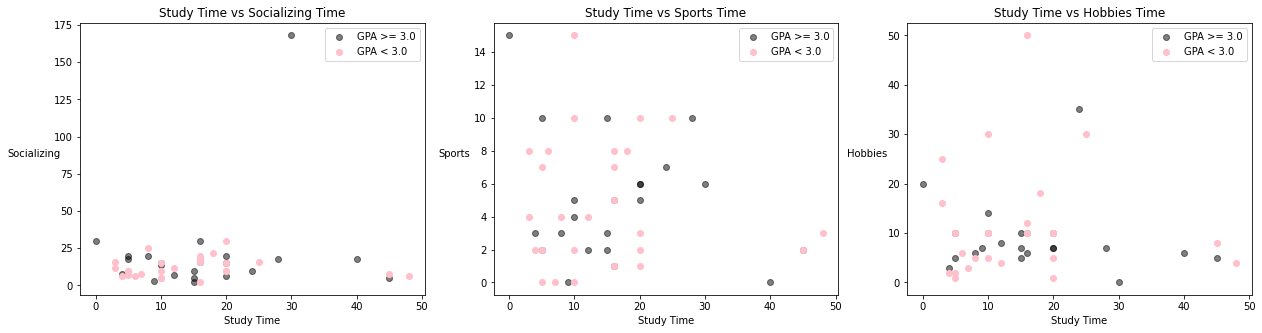

"\nIn the first two graph, nothing major is seen but on the third graph, few students who's gpa is lower than 3 spend more time on their hobbies and also few students who's gpa is higher than 3 spent more time on studying. Again not a major difference but it is still interesting to see.\n"

In [276]:
# WRITE YOUR IMPLEMENTATION HERE!! 

time_3 = df[df["GPA"] >= 3.0]
time_2 = df[df["GPA"] < 3.0]

other_time = time_3["Time_For_Hobbies"] + time_3["Time_For_Sports"] + time_3["Time_For_Socializing"] + time_3["Time_For_Entertainment"] # sum the time for hobbies, sports, socializing and entertainment
other_time_2 = time_2["Time_For_Hobbies"] + time_2["Time_For_Sports"] + time_2["Time_For_Socializing"] + time_2["Time_For_Entertainment"] # sum the time for hobbies, sports, socializing and entertainment

plt.subplot(1, 3, 1).figure.set_size_inches(21, 5)
plt.scatter(time_3["Time_For_Study"], time_3["Time_For_Socializing"], color="black", alpha=0.5) # plot the time for study vs time for socializing
plt.scatter(time_2["Time_For_Study"], time_2["Time_For_Socializing"], color="pink")
plt.legend(["GPA >= 3.0", "GPA < 3.0"])
plt.xlabel("Study Time")
plt.ylabel("Socializing", rotation=0, labelpad=20)
plt.title("Study Time vs Socializing Time") # plot the time for study vs time for socializing for the students who have GPA >= 3.0 and GPA < 3.0

plt.subplot(1, 3, 2)
plt.scatter(time_3["Time_For_Study"], time_3["Time_For_Sports"], color="black", alpha=0.5)
plt.scatter(time_2["Time_For_Study"], time_2["Time_For_Sports"], color="pink")
plt.legend(["GPA >= 3.0", "GPA < 3.0"])
plt.xlabel("Study Time")
plt.ylabel("Sports", rotation=0, labelpad=20)
plt.title("Study Time vs Sports Time")

plt.subplot(1, 3, 3)
plt.scatter(time_3["Time_For_Study"], time_3["Time_For_Hobbies"], color="black", alpha=0.5)
plt.scatter(time_2["Time_For_Study"], time_2["Time_For_Hobbies"], color="pink")
plt.legend(["GPA >= 3.0", "GPA < 3.0"])
plt.xlabel("Study Time")
plt.ylabel("Hobbies", rotation=0, labelpad=20)
plt.title("Study Time vs Hobbies Time")
plt.show()
"""
In the first two graph, nothing major is seen but on the third graph, few students who's gpa is lower than 3 spend more time on their hobbies and also few students who's gpa is higher than 3 spent more time on studying. Again not a major difference but it is still interesting to see.
"""

Q3g) Use the same GPA threshold and group the data frame into two segments as in the previous part. Select an appropriate plot type for depicting the time used for studying, sports and social activities, hobbies, and entertainment. Please include a legend for highlighting the differences between these two segments, and write down below if there are any significant differences in the preference of spending time.

A3g:)

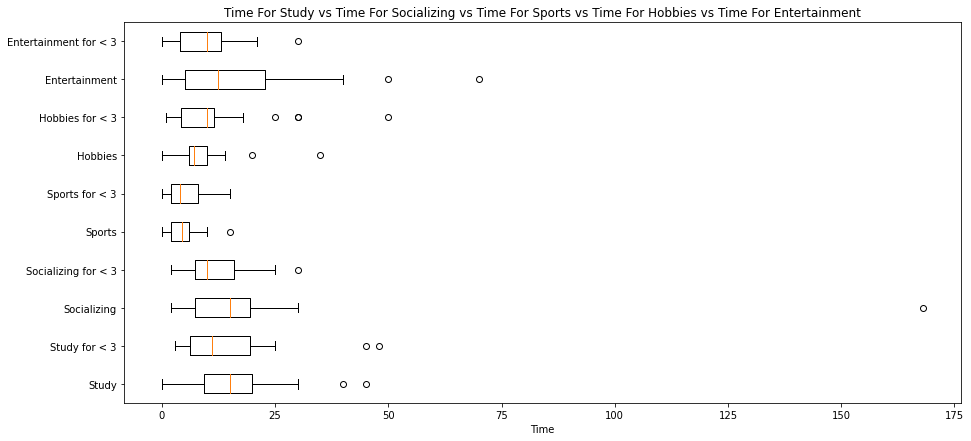

'\nPeople who have low gpa has less time for studying (mean was similar but median and the distribution is different and if we take out the outliers we can see that the distribution is different)\n\nGenerally low gpa people have less time to study. \nOn the other hand, it is not fully possible to say that other activities are related to gpa.\n'

In [293]:
# WRITE YOUR IMPLEMENTATION HERE!! 
"""
plt.subplot(2, 2, 1).figure.set_size_inches(14, 10)
plt.scatter(time_3["Time_For_Study"], time_3["Time_For_Socializing"], color="black", alpha=0.5)
plt.scatter(time_2["Time_For_Study"], time_2["Time_For_Socializing"], color="pink")
plt.legend(["GPA >= 3.0", "GPA < 3.0"])

plt.subplot(2, 2, 2)
plt.scatter(time_3["Time_For_Study"], time_3["Time_For_Sports"], color="black", alpha=0.5)
plt.scatter(time_2["Time_For_Study"], time_2["Time_For_Sports"], color="pink")

plt.subplot(2, 2, 3)
plt.scatter(time_3["Time_For_Study"], time_3["Time_For_Hobbies"], color="black", alpha=0.5)
plt.scatter(time_2["Time_For_Study"], time_2["Time_For_Hobbies"], color="pink")

plt.subplot(2, 2, 4)
plt.scatter(time_3["Time_For_Study"], time_3["Time_For_Entertainment"], color="black", alpha=0.5)
plt.scatter(time_2["Time_For_Study"], time_2["Time_For_Entertainment"], color="pink")
plt.show()
"""

plt.figure(figsize=(15, 7))
plt.boxplot([time_3["Time_For_Study"], time_2["Time_For_Study"], time_3["Time_For_Socializing"], time_2["Time_For_Socializing"], time_3["Time_For_Sports"], time_2["Time_For_Sports"], time_3["Time_For_Hobbies"], time_2["Time_For_Hobbies"], time_3["Time_For_Entertainment"], time_2["Time_For_Entertainment"]], vert=False)

plt.title("Time For Study vs Time For Socializing vs Time For Sports vs Time For Hobbies vs Time For Entertainment")
plt.xlabel("Time")
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["Study", "Study for < 3", "Socializing", "Socializing for < 3", "Sports", "Sports for < 3", "Hobbies", "Hobbies for < 3", "Entertainment", "Entertainment for < 3"])
plt.show()

"""
People who have low gpa has less time for studying (mean was similar but median and the distribution is different and if we take out the outliers we can see that the distribution is different)

Generally low gpa people have less time to study. 
On the other hand, it is not fully possible to say that other activities are related to gpa.
"""

Q3h) Do the same experimentation as (Q3g) for identifying whether there is any difference between the segments in terms of the requirements for math, programming, arts/music and sports.

A3h:)

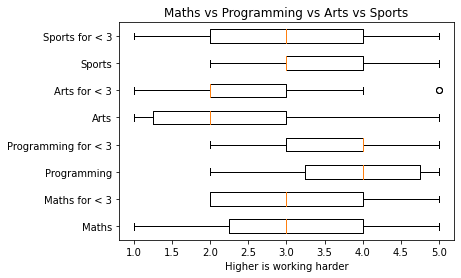

'\nPeople who have higher gpa tend to think that programming requires hard work more than people with lower gpa. This is the only noticeable difference.\n'

In [294]:
# WRITE YOUR IMPLEMENTATION HERE!! 

plt.boxplot([time_3["Maths"], time_2["Maths"], time_3["Programming"], time_2["Programming"], time_3["Arts"], time_2["Arts"], time_3["Sports"], time_2["Sports"]], vert=False)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8], ["Maths", "Maths for < 3", "Programming", "Programming for < 3", "Arts", "Arts for < 3", "Sports", "Sports for < 3"])
plt.title("Maths vs Programming vs Arts vs Sports") # plot the boxplot for the students who have GPA >= 3.0 and GPA < 3.0
plt.xlabel("Higher is working harder")
plt.show()

"""
People who have higher gpa tend to think that programming requires hard work more than people with lower gpa. This is the only noticeable difference.
"""

# Q4) Covariance/Correlation Matrices 

Q4a) Find the covariance and correlation matrices of the variables, and plot them on a good-looking heatmap. You can use the pandas/sklearn functions for this task. Comment on your results.

<ipython-input-302-74c077db8ede>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


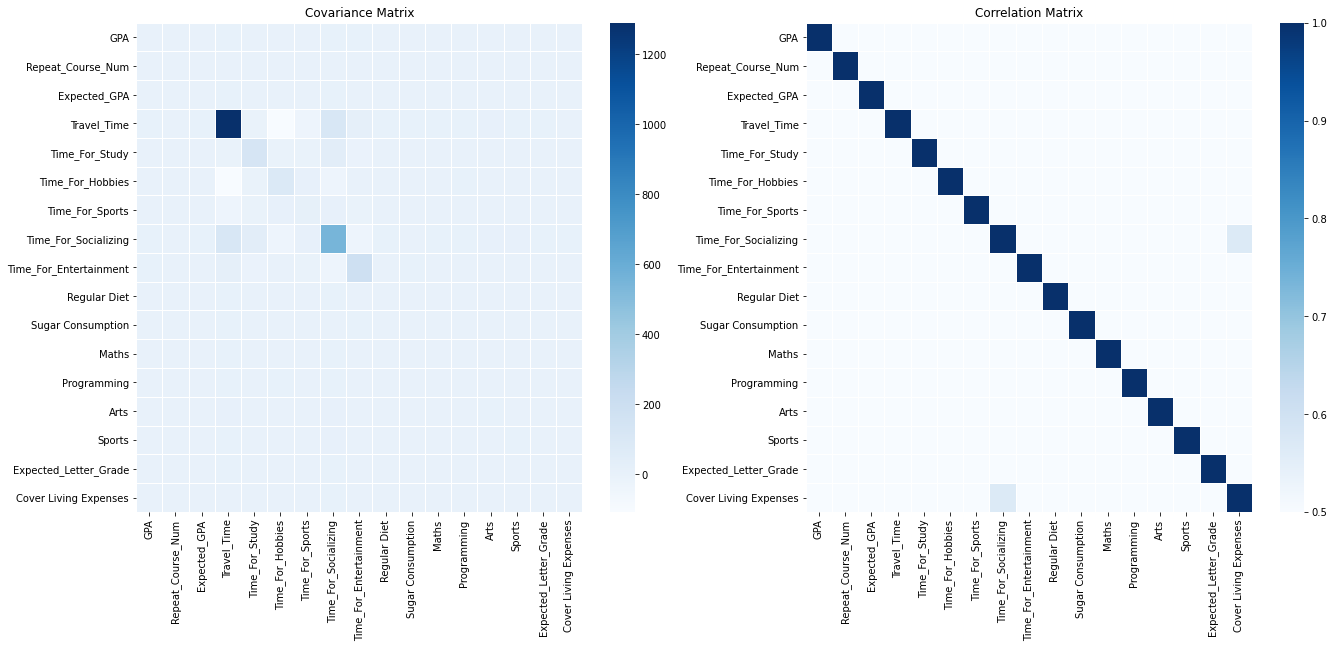

In [302]:
# WRITE YOUR IMPLEMENTATION HERE!! 
import seaborn as sns
cov_matrix = df.cov()
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(22, 9))
plt.subplot(1, 2, 1)
sns.heatmap(cov_matrix, annot=False, linewidths=1, cmap="Blues") # plot the covariance matrix
plt.title("Covariance Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix, vmin=0.5, annot=False, linewidths=1, cmap="Blues") # plot the correlation matrix with vmin=0.5
plt.title("Correlation Matrix")
plt.show()

# the only strong correlation we saw was "Cover Living Expenses" and "Time For Socializing" where the correlation was higher than 0.5.
# other than that, there was no strong correlation between the variables..
# the covariance results are also not that visible.

Q4b) Based on the correlation matrix, which of the variables are strongly ($r_{xy} > 0.5 || r_{xy} < -0.5$) correlated? Which variable tuple has the highest (anti)correlation?

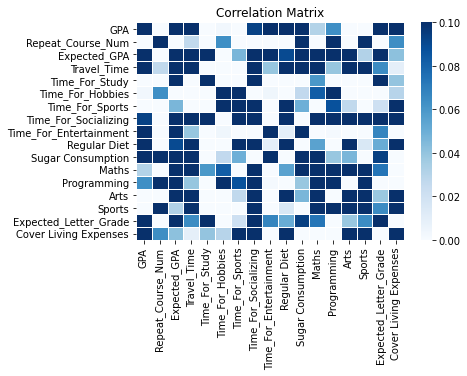

In [296]:
sns.heatmap(corr_matrix, vmax=0.1, vmin=0, annot=False, linewidths=1, cmap="Blues") # plot the correlation matrix with vmax=0.1 and vmin=0
plt.title("Correlation Matrix")
plt.show()

# the least correlated are in the below graph, white colored ones.

# Q5) Hypothesis Testing

Select an appropriate test name and type for the hypothesis questions below and provide the p-value as well while defining the significance. You may want to use SciPy here.

Q5a) Do working students study less than their non-working counterparts?

In [297]:
# WRITE YOUR IMPLEMENTATION HERE!! 
working = df[df["Cover Living Expenses"] == 1]
not_working = df[df["Cover Living Expenses"] == 0]

print(stats.ttest_ind(working["Time_For_Study"], not_working["Time_For_Study"])) # perform the t-test for the students who cover their living expenses and the students who don't cover their living expenses for the "Time For Study" variable
print("working:" ,working["Time_For_Study"].mean())
print("not_working:" ,not_working["Time_For_Study"].mean())

"""
People who work are also studying more but this could be because there are not much people who are working so our sample size is small.
Also the p value is way too high which means that we cannot reject the null hypothesis. (higher p value means that the data is not statistically relevant)

"""

Ttest_indResult(statistic=0.27149029926092405, pvalue=0.7872286833893175)
working: 17.0
not_working: 15.386363636363637


'\nPeople who work are also studying more but this could be because there are not much people who are working so our sample size is small.\nAlso the p value is way too high which means that we cannot reject the null hypothesis. (higher p value means that the data is not statistically relevant)\n\n'

Q5b) Do students having lower GPA tend to believe intelligence is more key for programming?

In [299]:
# WRITE YOUR IMPLEMENTATION HERE!! 
# gpa lower than 3
gpa_3 = df[df["GPA"] < 3.0]
# gpa higher than 3
gpa_3_1 = df[df["GPA"] >= 3.0]
# higher means hard work
print("Lower than 3 GPA: (mean) ", np.mean(gpa_3["Maths"]),"Higher than 3 GPA: (mean) ",  np.mean(gpa_3_1["Maths"])) # print the mean of the "Maths" variable for the students who have GPA < 3.0 and the students who have GPA >= 3.0
print("Lower than 3 GPA: ", stats.ttest_ind(gpa_3["GPA"], gpa_3["Maths"])) # perform the t-test for the students who have GPA < 3.0 and the students who have GPA >= 3.0 for the "Maths" variable
print("Higher Than 3 GPA:", stats.ttest_ind(gpa_3_1["GPA"], gpa_3_1["Maths"]))

"""
People who have higher gpa think that maths requires more hard work than people who have lower gpa.
And the p value for higher than 3 gpa is high which means that we cannot reject the null hypothesis. (the data is not relevant at all)
"""

Lower than 3 GPA: (mean)  3.076923076923077 Higher than 3 GPA: (mean)  3.1818181818181817
Lower than 3 GPA:  Ttest_indResult(statistic=-3.393027598112566, pvalue=0.001359691198421027)
Higher Than 3 GPA: Ttest_indResult(statistic=0.8037378326175807, pvalue=0.4260741350111259)


'\nPeople who have higher gpa think that maths requires more hard work than people who have lower gpa.\nAnd the p value for higher than 3 gpa is high which means that we cannot reject the null hypothesis. (the data is not relevant at all)\n'

Q5c) Write your own hypothesis question here!!
Since this course is also about programming and people suffered from python class last term, I am going to ask Q5b with programming:

In [291]:
# WRITE YOUR IMPLEMENTATION HERE!! 
# gpa lower than 3
gpa_3 = df[df["GPA"] < 3.0]
# gpa higher than 3
gpa_3_1 = df[df["GPA"] >= 3.0]
# higher means hard work
print("Lower than 3 GPA: (mean) ", np.mean(gpa_3["Programming"]),"Higher than 3 GPA: (mean) ",  np.mean(gpa_3_1["Programming"])) # print the mean of the "Programming" variable for the students who have GPA < 3.0 and the students who have GPA >= 3.0
print("Lower than 3 GPA: ", stats.ttest_ind(gpa_3["GPA"], gpa_3["Programming"])) # perform the t-test for the students who have GPA < 3.0 and the students who have GPA >= 3.0 for the "Programming" variable
print("Higher Than 3 GPA:", stats.ttest_ind(gpa_3_1["GPA"], gpa_3_1["Programming"]))

"""
People who have higher gpa think that programming requires more hard work than people who have lower gpa.
And all the p values are low which shows us that the data could be relevant and significant.
"""

Lower than 3 GPA: (mean)  3.8076923076923075 Higher than 3 GPA: (mean)  3.9545454545454546
Lower than 3 GPA:  Ttest_indResult(statistic=-7.153039699626522, pvalue=3.4584008396318955e-09)
Higher Than 3 GPA: Ttest_indResult(statistic=-3.05016502641022, pvalue=0.003951469079894672)


'\nPeople who have higher gpa think that programming requires more hard work than people who have lower gpa.\nAnd all the p values are low which shows us that the data could be relevant and significant.\n'